In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
warnings.filterwarnings(action="ignore")
#%matplotlib qt # displays a pop-up of the plot
%matplotlib inline # keeps it within the notebook

UsageError: unrecognized arguments: # keeps it within the notebook


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_csv('C:/application/interview_prep/bank-additional/bank-additional/bank-additional-full.csv', sep=";")
print(df.shape)
df.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11

In [51]:
df.month.unique()

array([6, 4, 3, 1, 8, 7, 2, 5, 0, 9], dtype=int64)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df_copy = df

In [7]:

df_copy = df_copy.replace('unknown', np.nan)
df_copy = df_copy.replace(999,np.nan)

In [8]:

df_copy.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

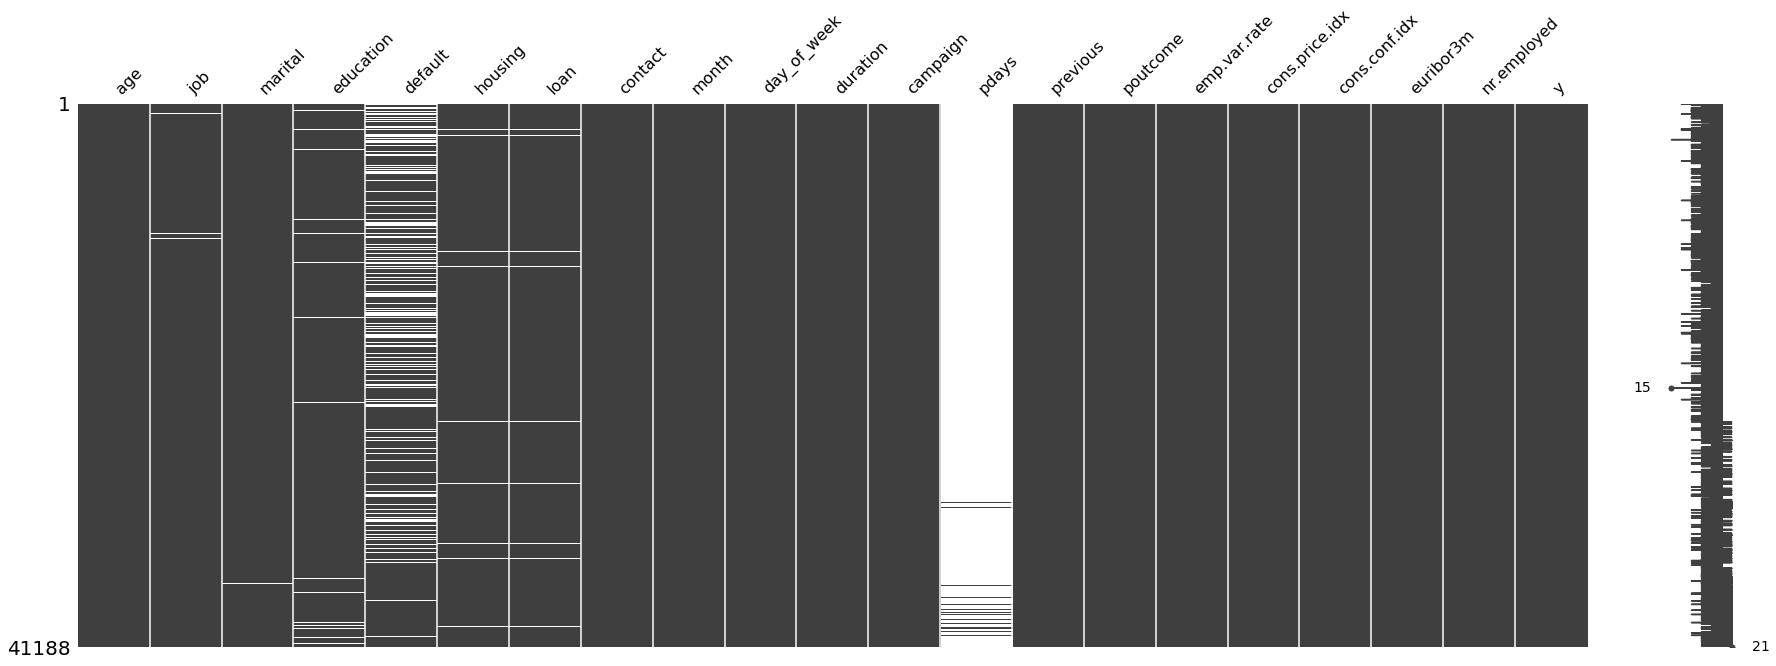

In [9]:
# How many missing values are there in our dataset?

missingno.matrix(df_copy, figsize = (30,10))

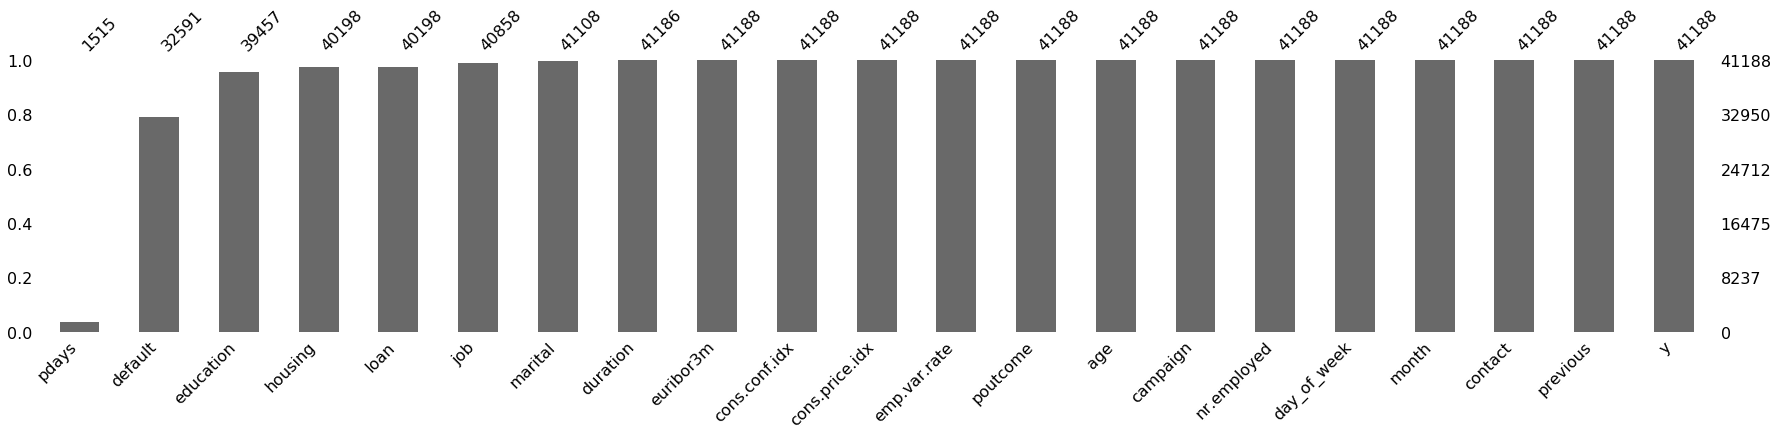

In [10]:

missingno.bar(df_copy, sort='ascending', figsize = (30,5))

- The purpose of creating a new dataset that contains all the values that are unknown and replace them with nan values give us the real picture of where data is missing.


- One way to clean dataset is to delete it, but it gives a bad image of the data and it is unrealistic.


- Another way is to find some correlation between the data and fill it in(Imputation).


- From the above analysis we can analyse that variables that has missing value are:-
    - **pdays(39673)**
    - **default(8597)**
    - **education(1731)**
    - **housing(990)**
    - **loan(990)**
    - **job(330)**
    - **marital(80)**
    
- Out of this 7 columns the values 'marital' missing are very low and missing values in 'default' are actually not missing. It might be a case that customer is not willing to disclose this information to the banking representative . so 'unknown' is a specific value in default and we need to consider it as is.


- So, the missing values in columns **'pdays' , 'education', 'housing' , 'loan' , 'job'** need to be taken care of.

# Process of handling missing values - Imputation

- Considering 2 columns 'education' and 'job' 
- Initally we will make a cross-tabulation between 'education' and 'job' 
- Hypothesis here is that 'job' of a person is infuenced by 'education' of person.
- So inferring 'job' based on education make sense.
- Also, one more hypothesis is that if the age > 60 then the job is retired as most of the take a retirement at the age of 60

In [11]:
def cross_tab(df,f1,f2):
    feature1=list(df[f1].unique())
    feature2=list(df[f2].unique())
    dataframes=[]
    for f in feature2:
        df_f2=df[df[f2]==f]
        df_f1=df_f2.groupby(f1).count()[f2]
        dataframes.append(df_f1)
    df_ct=pd.concat(dataframes,axis=1)
    df_ct.columns=feature2
    df_ct=df_ct.fillna(0)
    return df_ct

In [12]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


In [13]:
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64


- **Inferring education from jobs** :
    - From the cross-tabulation, it can be seen that people with management jobs usually have a university degree.
    - Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. 
    - Similarly, 'job' = 'services' then 'education' = 'high.school' and 'job' = 'housemaid' then 'education' = 'basic.4y'.


- **Inferring jobs from education** : 
    - If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. 
    - If 'education' = 'professional.course', then the 'job' = 'technician'.


- **Inferring jobs from age**: 
    - As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

In [14]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [15]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0
technician,58.0,873,87.0,384.0,3330.0,212.0,1809,0.0



- **Imputations for house and loan** : Using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.'
    - Hypothesis is that housing loan status (Yes or No) should be in the proportion of each job category.
    - Hence using the known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). 
    - Similarly, we have filled the missing values in the 'loan' variable.

In [16]:
jobhousing=cross_tab(df,'job','housing')
cross_tab(df,'job','housing')


,no,yes,unknown
job,,,
admin.,4636,5559,227
blue-collar,4362,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


In [17]:
jobloan=cross_tab(df,'job','loan')
cross_tab(df,'job','loan')

,no,yes,unknown
job,,,
admin.,8485,1710,227
blue-collar,7730,1384,241
entrepreneur,1214,206,36
housemaid,877,154,29
management,2414,439,71
retired,1452,245,44
self-employed,1186,195,40
services,3267,601,101
student,710,142,23


In [18]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df


def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [19]:
df=fillhousing(df,jobhousing)
df=fillloan(df,jobloan)

In [20]:
cross_tab(df,'job','housing')


,no,yes,unknown
admin.,4726,5696,0.0
blue-collar,4485,4870,0.0
entrepreneur,659,797,0.0
housemaid,502,558,0.0
management,1407,1517,0.0
retired,815,926,0.0
self-employed,664,757,0.0
services,1871,2098,0.0
student,392,483,0.0
technician,3060,3693,0.0


In [21]:
cross_tab(df,'job','loan')


,no,yes,unknown
admin.,8678,1744,0.0
blue-collar,7939,1416,0.0
entrepreneur,1245,211,0.0
housemaid,900,160,0.0
management,2477,447,0.0
retired,1489,252,0.0
self-employed,1217,204,0.0
services,3350,619,0.0
student,728,147,0.0
technician,5742,1011,0.0


- **Handing missing values for pdays**
            

 - Below Graph shows distribution of 'pdays'

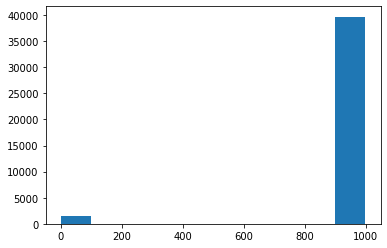

In [22]:
plt.hist(df['pdays'])
plt.show()

- Below Distribution shows value of 'pdays' without 999

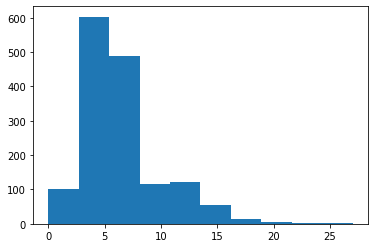

In [23]:
plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

In [24]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


- As seen from the above table the majority of pdays missing value occur when the 'poutcome' is 'non-existent'.
- Which means when pdays value is missing because the customer was never contacted.
- To deal with this situation the best possible way is to convert the numeric variable of pdays to categorical with introducting new categories like:-
    - **pdays_missing** : where value is not present
    - **pdays_less_5** : pdays is less than 5
    - **pdays_bet_5_15** : pdays between 5 to 15
    - **pdays_greater_15** : pdays are greater than 15 
- Buckets are created according to the distribution plotted above to make sense

In [25]:
#Add new categorical variables to our dataframe.
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1
df = df.drop('pdays', axis=1)

In [26]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0


# Conclusion on Handling missing value


- Used Imputation technique to fill missing value for column 'job', 'education', 'housing', 'loan'


- Imputed values were relation between variable made sense and kept the rest as 'unknow' to handle real world situation were a client/customer might not give all the required values


- Convered 'pdays' to categorical variable making buckets which made sense w.r.t to data distribution

# Standardizing the Data 


- Standardizing the data is required as all the numerical variables distribution is having different scale and if the model is trained on such data there is a possibility that it will create a Bias

In [27]:
numeric_columns = ['age','duration','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pdays_missing','pdays_less_5','pdays_greater_15','pdays_bet_5_15']

In [28]:
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.053070,0.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1.0,0.0,0.0,0.0
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,0.030297,0.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1.0,0.0,0.0,0.0
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,0.045954,0.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1.0,0.0,0.0,0.0
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.030704,0.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1.0,0.0,0.0,0.0
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,0.062424,0.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1.0,0.0,0.0,0.0


In [30]:
df_le = df

# Converting Categorical variables to numeric (using One Hot Encoding)


- Ordinal Variables ('poutcome', 'default', 'housing' and 'loan' are ordinal ordinal variables)


- Nominal Variables ('job', 'maritial', 'education', 'contact', 'month', 'day_of_week' are Nominal Variables)

#  Handling Ordinal Variables

In [31]:
df['poutcome'] = df['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})
df['housing'] = df['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'unknown': 0,'no': 1})
df['y'] = df['y'].map({'yes': 1,'no' : 0})

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,0.481481,housemaid,married,basic.4y,1,1,1,telephone,may,mon,0.053070,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
1,0.493827,services,married,high.school,0,1,1,telephone,may,mon,0.030297,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
2,0.246914,services,married,high.school,1,-1,1,telephone,may,mon,0.045954,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
3,0.283951,admin.,married,basic.6y,1,1,1,telephone,may,mon,0.030704,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
4,0.481481,services,married,high.school,1,1,-1,telephone,may,mon,0.062424,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0


# Handling Nominal Variables(One Hot Encoding)

In [33]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
df_processed = pd.get_dummies(df,columns=nominal)

In [34]:
df_processed.head()

,age,default,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.053070,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0.493827,0,1,1,0.030297,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0.246914,1,-1,1,0.045954,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.283951,1,1,1,0.030704,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0.481481,1,1,-1,0.062424,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [35]:
len(df_processed.columns)

59

- Dropping 1 features from all the dummy variable as we have n categories only n-1 dummy variables are needed to reperesent that variable 

In [36]:
drop_feature = ['job_unknown','marital_married','education_unknown','contact_telephone', 'month_aug','day_of_week_mon']
df_processed = df_processed.drop(drop_feature,axis=1)
df_processed.head()

,age,default,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,month_apr,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.053070,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.493827,0,1,1,0.030297,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.246914,1,-1,1,0.045954,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.283951,1,1,1,0.030704,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.481481,1,1,-1,0.062424,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Using Label Encoding

In [37]:
le = preprocessing.LabelEncoder()
df_le.job = le.fit_transform(df_le.job)
df_le.marital = le.fit_transform(df_le.marital)
df_le.education = le.fit_transform(df_le.education)
df_le.default = le.fit_transform(df_le.default)
df_le.housing = le.fit_transform(df_le.housing)
df_le.loan = le.fit_transform(df_le.loan)
df_le.contact = le.fit_transform(df_le.contact)
df_le.month = le.fit_transform(df_le.month)
df_le.day_of_week = le.fit_transform(df_le.day_of_week)
df_le.poutcome = le.fit_transform(df_le.poutcome)
df_le.y = le.fit_transform(df_le.y)
df_le.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,0.481481,3,1,0,2,2,2,1,6,1,0.053070,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
1,0.493827,7,1,3,1,2,2,1,6,1,0.030297,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
2,0.246914,7,1,3,2,0,2,1,6,1,0.045954,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
3,0.283951,0,1,1,2,2,2,1,6,1,0.030704,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
4,0.481481,7,1,3,2,2,0,1,6,1,0.062424,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0


# Feature Importance


- Will try to find the features which are important to create our base model using Correlation and Lassocv

# Feature Importance of One Hot Encoded Data

# Using Correlation

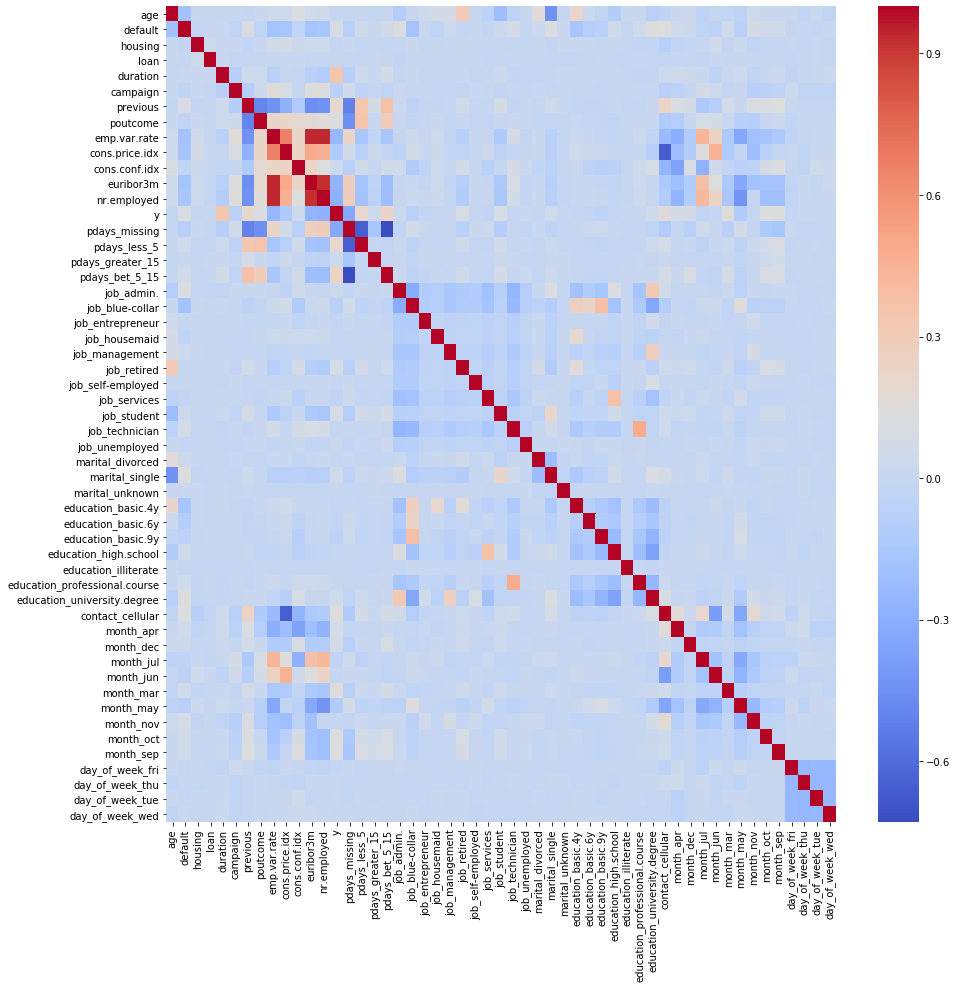

In [38]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_processed.corr(method='spearman'), annot=False, cmap='coolwarm')

In [39]:
#Correlation with output variable
cor = df_processed.corr()
cor_target = abs(cor["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

duration            0.405274
previous            0.230181
poutcome            0.129789
emp.var.rate        0.298334
cons.price.idx      0.136211
euribor3m           0.307771
nr.employed         0.354678
y                   1.000000
pdays_missing       0.324877
pdays_less_5        0.209159
pdays_bet_5_15      0.241540
contact_cellular    0.144773
month_mar           0.144014
month_may           0.108271
month_oct           0.137366
month_sep           0.126067
Name: y, dtype: float64

- Important Features according to Correlation w.r.t "y" are :-

**["duration", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "pdays_missing","pdays_less_5", "pdays_bet_5_15", "contact_cellular", "month_mar", "month_may", "month_oct", "month_sep" ]**

# Using Lassocv

RMSE of Lasso:  0.253221081059976


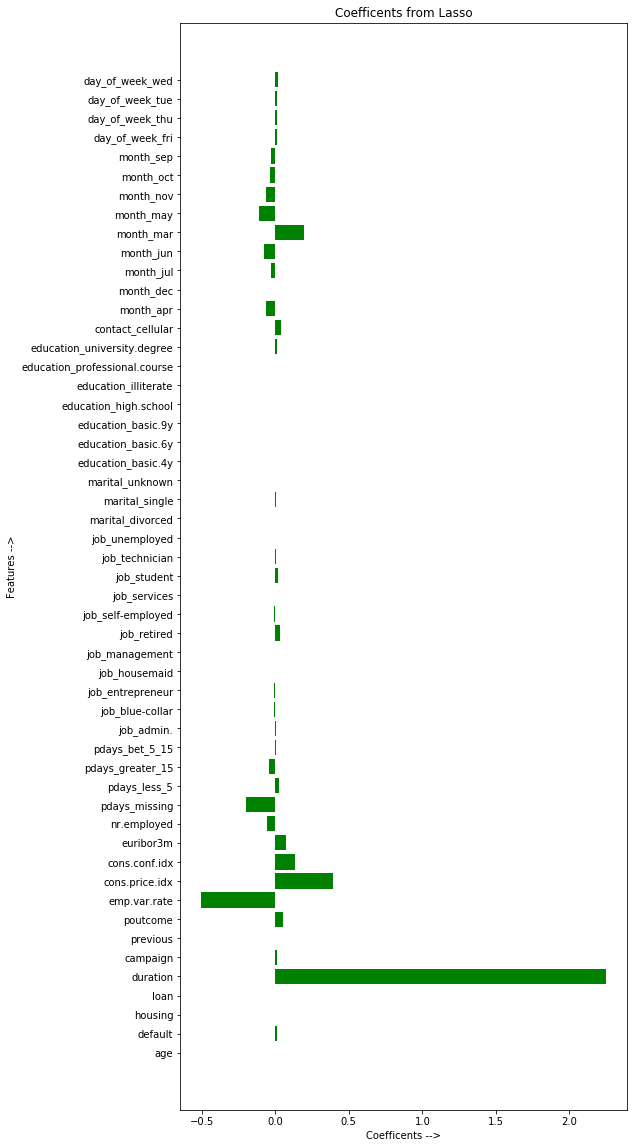

In [40]:
X = df_processed.drop('y', axis=1)
y = df_processed['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
#perform lassocv for variable selection
modellasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001, 10, 1000]).fit(X_train, y_train)
lassopred = modellasso.predict(X_test)
print("RMSE of Lasso: ", np.sqrt(mean_squared_error(lassopred, y_test)))
coeff = modellasso.coef_
x = list(X_train)
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize = (8,20))
plt.barh(x_pos, coeff, color='green')
plt.ylabel("Features -->")
plt.xlabel("Coefficents -->")
plt.title("Coefficents from Lasso")
plt.yticks(x_pos, x)

plt.show()

- Important Features according to lassocv w.r.t "y" are :-


**["duration" , "cons.price.idx", "cons.conf.idx", "euribor3m", "poutcome", "month_mar", "pdays_less_5", "job_retired", "job_student", "campaign", "default"]**

# Feature Importance of Label Encoded Data

# Using Correlation

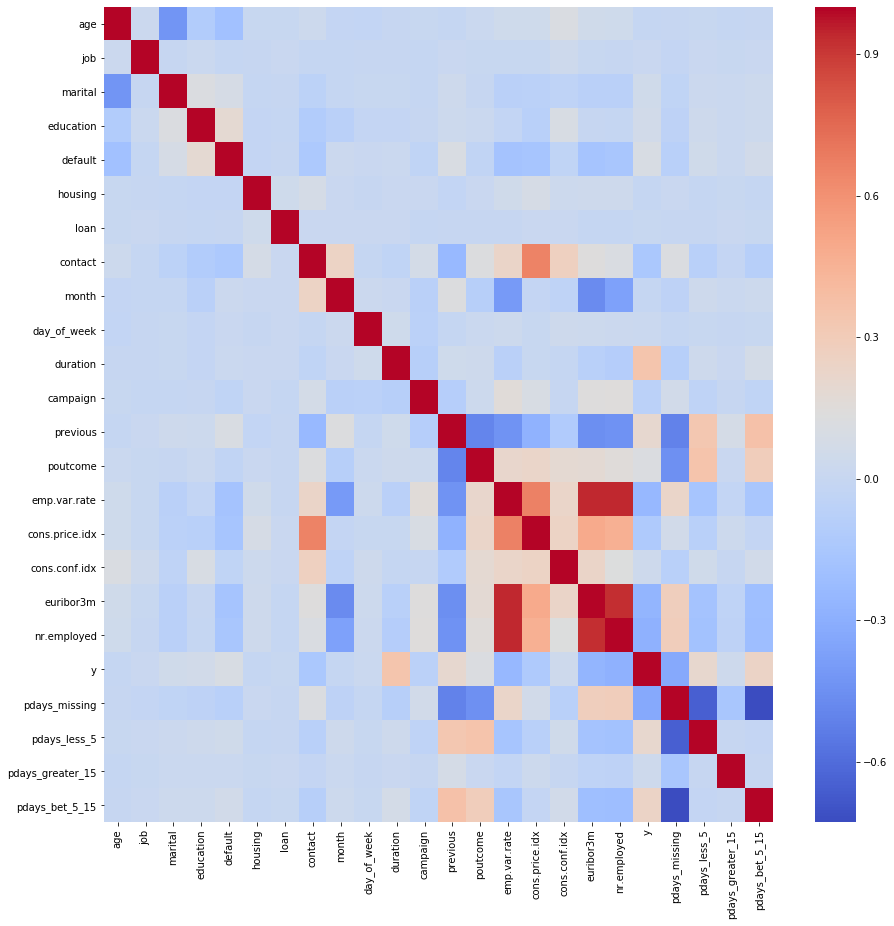

In [41]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_le.corr(method='spearman'), annot=False, cmap='coolwarm')

In [42]:
#Correlation with output variable
cor = df_le.corr()
cor_target = abs(cor["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

contact           0.144773
duration          0.405274
previous          0.230181
poutcome          0.129789
emp.var.rate      0.298334
cons.price.idx    0.136211
euribor3m         0.307771
nr.employed       0.354678
y                 1.000000
pdays_missing     0.324877
pdays_less_5      0.209159
pdays_bet_5_15    0.241540
Name: y, dtype: float64

- Important Features according to Correlation w.r.t "y" are :-


**["duration","contact", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "pdays_missing", "pdays_less_5", "pdays_bet_5_15"]**

# Using Lassocv

RMSE of Lasso:  0.2551378130386552


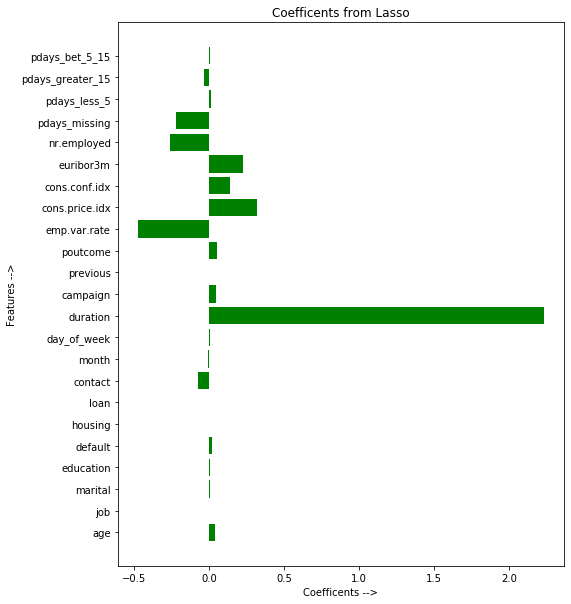

In [43]:
X = df_le.drop('y', axis=1)
y = df_le['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
#perform lassocv for variable selection
modellasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001, 10, 1000]).fit(X_train, y_train)
lassopred = modellasso.predict(X_test)
print("RMSE of Lasso: ", np.sqrt(mean_squared_error(lassopred, y_test)))
coeff = modellasso.coef_
x = list(X_train)
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize = (8,10))
plt.barh(x_pos, coeff, color='green')
plt.ylabel("Features -->")
plt.xlabel("Coefficents -->")
plt.title("Coefficents from Lasso")
plt.yticks(x_pos, x)

plt.show()

- Important Features according to lassocv w.r.t "y" are :-

**["duration", "cons.price.idx", "cons.conf.idx", "euribor3m", "campaign", "poutcome"]**

# Conclusion on Feature Importance


- The Features which are selected by Correlation and Lassocv for one hot and Label Encoding are :-
    - *Correlation with One hot Encoding*
    
    **["duration", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "pdays_missing","pdays_less_5", "pdays_bet_5_15", "contact_cellular", "month_mar", "month_may", "month_oct", "month_sep"]**
    
    - *Lassocv with one hot Encoding* 
    
    **["duration" , "cons.price.idx", "cons.conf.idx", "euribor3m", "poutcome", "month_mar", "pdays_less_5", "job_retired", "job_student", "campaign", "default"]**
    
    - *Correlation with Label Encoding* 
    
    **["duration","contact", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "pdays_missing", "pdays_less_5", "pdays_bet_5_15"]**
    
    - *Lassocv with Label Encoding* 
    
    **["duration", "cons.price.idx", "cons.conf.idx", "euribor3m", "campaign", "poutcome"]**


- It is clear from both the feature selection techniques that "duration" is highly related to the output and it will create a Bias if we include "duration" feature in our model building phase, so **dropping "duration"** is the right option


- Additionally duration of call is known after the call is ended which is the case with knowing whether the person will sign up for a "term deposite" or not 

# Saving the Data for Model building 

In [44]:
df_processed = df_processed.drop('duration',axis=1)
df_processed.head()

,age,default,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,month_apr,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.493827,0,1,1,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.246914,1,-1,1,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.283951,1,1,1,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.481481,1,1,-1,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
len(df_processed.columns)

52

In [46]:
df_processed.to_csv("C:/application/interview_prep/bank-additional/bank-additional/bank_full_processed.csv", index = False)

In [47]:
df_le = df_le.drop('duration',axis=1)
df_le.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,0.481481,3,1,0,2,2,2,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
1,0.493827,7,1,3,1,2,2,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
2,0.246914,7,1,3,2,0,2,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
3,0.283951,0,1,1,2,2,2,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0
4,0.481481,7,1,3,2,2,0,1,6,1,0.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,1.0,0.0,0.0,0.0


In [48]:
len(df_le.columns)

23

In [49]:
df_le.to_csv("C:/application/interview_prep/bank-additional/bank-additional/bank_full_processed_le.csv", index = False)

# Conclusion


- Found missing values and tried imputating it with cross-functional relations
- Standardized the Data to bring it to the same scale 
- Converted Categorical variables to numeric which is required for many ML Modeling algorithms 
- Tried finding feature importance using Correlation and Lassocv
- Dropped feature "duration" as it would have created Bias in model building phase 

# *please refer Model Building & Evaluation for next steps*